I worked on this project with James Della-Giustina & Ryan Paxson so I want to give them credit first and foremost



The Lorenz system
$$
\begin{aligned}
& \frac{d x}{d t}=\sigma(y-x) \\
& \frac{d y}{d t}=x(\rho-z)-y \\
& \frac{d z}{d t}=x y-\beta z
\end{aligned}
$$
where $\sigma=10, \rho=28$, and $\beta=8 / 3$.

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
from matplotlib.animation import FuncAnimation

In [2]:
# Set parameters
sigma, rho, beta = 10, 28, 8/3  # Define the constants for the Lorenz system

In [3]:
# Define the Lorenz system functions
def lorenz_x(t, x, y, z, sigma):
    return sigma * (y - x)  # Compute the x-component of the Lorenz system

def lorenz_y(t, x, y, z, rho):
    return x * (rho - z) - y  # Compute the y-component of the Lorenz system

def lorenz_z(t, x, y, z, beta):
    return x * y - beta * z  # Compute the z-component of the Lorenz system


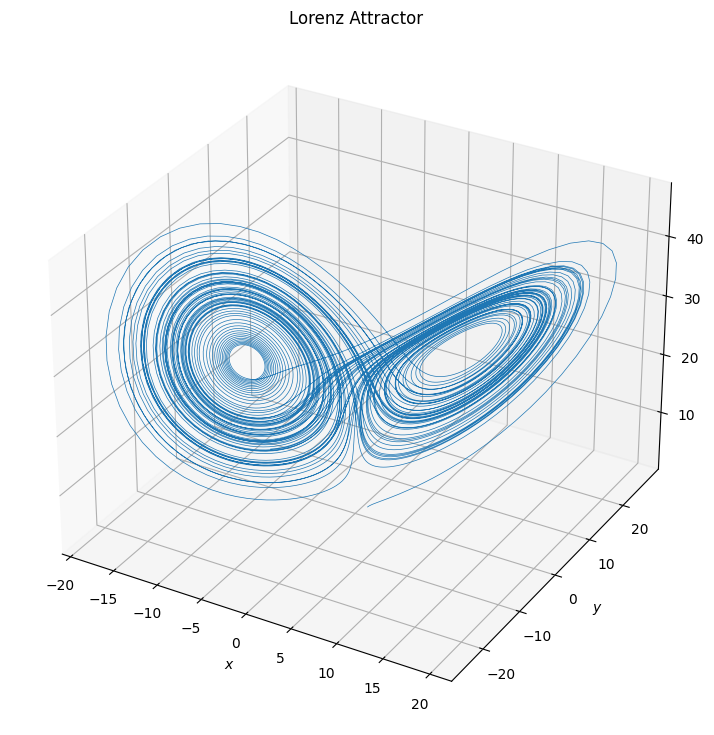

In [4]:
# Implement the 4th order Runge-Kutta method for the Lorenz system
def runge_kutta_lorenz(x, y, z, t, h, sigma, rho, beta):
  
    # Compute the k1 values for x, y, z
    k1_x = lorenz_x(t, x, y, z, sigma)
    k1_y = lorenz_y(t, x, y, z, rho)
    k1_z = lorenz_z(t, x, y, z, beta)

    # Compute the k2 values for x, y, z
    k2_x = lorenz_x(t + h/2, x + h*k1_x/2, y + h*k1_y/2, z + h*k1_z/2, sigma)
    k2_y = lorenz_y(t + h/2, x + h*k1_x/2, y + h*k1_y/2, z + h*k1_z/2, rho)
    k2_z = lorenz_z(t + h/2, x + h*k1_x/2, y + h*k1_y/2, z + h*k1_z/2, beta)

    # Compute the k3 values for x, y, z
    k3_x = lorenz_x(t + h/2, x + h*k2_x/2, y + h*k2_y/2, z + h*k2_z/2, sigma)
    k3_y = lorenz_y(t + h/2, x + h*k2_x/2, y + h*k2_y/2, z + h*k2_z/2, rho)
    k3_z = lorenz_z(t + h/2, x + h*k2_x/2, y + h*k2_y/2, z + h*k2_z/2, beta)

    # Compute the k4 values for x, y, z
    k4_x = lorenz_x(t + h, x + h*k3_x, y + h*k3_y, z + h*k3_z, sigma)
    k4_y = lorenz_y(t + h, x + h*k3_x, y + h*k3_y, z + h*k3_z, rho)
    k4_z = lorenz_z(t + h, x + h*k3_x, y + h*k3_y, z + h*k3_z, beta)

    # Compute the next values of x, y, z using the Runge-Kutta method
    x_next = x + (h/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    y_next = y + (h/6) * (k1_y + 2*k2_y + 2*k3_y + k4_y)
    z_next = z + (h/6) * (k1_z + 2*k2_z + 2*k3_z + k4_z)

    return x_next, y_next, z_next


# Set initial conditions and time step
x0, y0, z0 = 1, 1, 1  # Define the initial conditions
h = 0.01  # Define the time step
t_max = 80  # Define the maximum time value
n_steps = int(t_max / h) + 1 # Calculate the number of steps needed

# Integrate the Lorenz system
x, y, z = np.zeros(n_steps), np.zeros(n_steps), np.zeros(n_steps)  # Initialize arrays to store x, y, z values
x[0], y[0], z[0] = x0, y0, z0  # Set the initial conditions
t = 0  # Initialize the time 

# Loop through all time steps
for i in range(1, n_steps):
    x[i], y[i], z[i] = runge_kutta_lorenz(x[i-1], y[i-1], z[i-1], t, h, sigma, rho, beta)  # Update x, y, z values using the Runge-Kutta method
    t += h  # Update the time variable

# Create a 3D plot of the Lorenz attractor
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot to the figure
ax.plot(x, y, z, lw=0.5)  # Plot the Lorenz attractor trajectory
ax.set_xlabel("$x$")  # Set the x-axis label
ax.set_ylabel("$y$")  # Set the y-axis label
ax.set_zlabel("$z$")  # Set the z-axis label
ax.set_title("Lorenz Attractor")  # Set the plot title

plt.show()  # Display the plot

The Lorenz system-with Data Assimilation
$$
\begin{aligned}
& \frac{d u}{d t}=\sigma(v-u)-\mu\left(u_n-x_n\right) \\
& \frac{d v}{d t}=u(\rho-w)-v \\
& \frac{d w}{d t}=u v-\beta w
\end{aligned}
$$
where $\sigma=10, \rho=28$, $\beta=8 / 3$, and $\mu=26$.

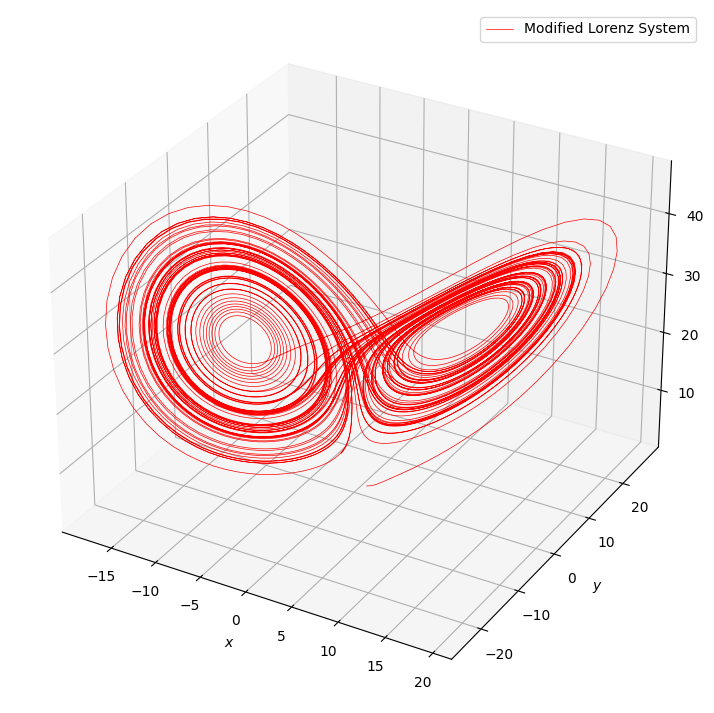

In [5]:
# Define the parameters
sigma = 10
rho = 28
beta = 8/3
mu = 23

# Define the first set of differential equations (Lorenz model)
def lorenz_model(x, y, z):
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return dx_dt, dy_dt, dz_dt

# Define the second set of differential equations (Modified Lorenz model)
def modified_lorenz_model(u, v, w, xn):
    du_dt = sigma * (v - u) - mu * (u  - xn)
    dv_dt = u * (rho - w) - v
    dw_dt = u * v - beta * w
    return du_dt, dv_dt, dw_dt

# Implement the Runge-Kutta 4th order method
def runge_kutta4_modified_lorenz(u0, v0, w0, x0, y0, z0, h, timesteps):
    m_u = [u0]
    m_v = [v0]
    m_w = [w0]
    m_x = [x0]
    m_y = [y0]
    m_z = [z0]

    for _ in range(timesteps):
        m_k1_u, m_k1_v, m_k1_w = modified_lorenz_model(m_u[-1], m_v[-1], m_w[-1], m_x[-1])
        m_k1_x, m_k1_y, m_k1_z = lorenz_model(m_x[-1], m_y[-1], m_z[-1])

        m_k2_u, m_k2_v, m_k2_w = modified_lorenz_model(m_u[-1] + 0.5 * m_h * m_k1_u, m_v[-1] + 0.5 * m_h * m_k1_v, m_w[-1] + 0.5 * m_h * m_k1_w, m_x[-1] + 0.5 * m_h * m_k1_x)
        m_k2_x, m_k2_y, m_k2_z = lorenz_model(m_x[-1] + 0.5 * m_h * m_k1_x, m_y[-1] + 0.5 * m_h * m_k1_y, m_z[-1] + 0.5 * m_h * m_k1_z)

        m_k3_u, m_k3_v, m_k3_w = modified_lorenz_model(m_u[-1] + 0.5 * m_h * m_k2_u, m_v[-1] + 0.5 * m_h * m_k2_v, m_w[-1] + 0.5 * m_h * m_k2_w, m_x[-1] + 0.5 * m_h * m_k2_x)
        m_k3_x, m_k3_y, m_k3_z = lorenz_model(m_x[-1] + 0.5 * m_h * m_k2_x, m_y[-1] + 0.5 * m_h * m_k2_y, m_z[-1] + 0.5 * m_h * m_k2_z)

        m_k4_u, m_k4_v, m_k4_w = modified_lorenz_model(m_u[-1] + m_h * m_k3_u, m_v[-1] + m_h * m_k3_v, m_w[-1] + m_h * m_k3_w, m_x[-1] + m_h * m_k3_x)
        m_k4_x, m_k4_y, m_k4_z = lorenz_model(m_x[-1] + m_h * m_k3_x, m_y[-1] + m_h * m_k3_y, m_z[-1] + m_h * m_k3_z)

        m_u_new = m_u[-1] + (m_h / 6) * (m_k1_u + 2 * m_k2_u + 2 * m_k3_u + m_k4_u)
        m_v_new = m_v[-1] + (m_h / 6) * (m_k1_v + 2 * m_k2_v + 2 * m_k3_v + m_k4_v)
        m_w_new = m_w[-1] + (m_h / 6) * (m_k1_w + 2 * m_k2_w + 2 * m_k3_w + m_k4_w)
        m_x_new = m_x[-1] + (m_h / 6) * (m_k1_x + 2 * m_k2_x + 2 * m_k3_x + m_k4_x)
        m_y_new = m_y[-1] + (m_h / 6) * (m_k1_y + 2 * m_k2_y + 2 * m_k3_y + m_k4_y)
        m_z_new = m_z[-1] + (m_h / 6) * (m_k1_z + 2 * m_k2_z + 2 * m_k3_z + m_k4_z)

        m_u.append(m_u_new)
        m_v.append(m_v_new)
        m_w.append(m_w_new)
        m_x.append(m_x_new)
        m_y.append(m_y_new)
        m_z.append(m_z_new)

    return m_u, m_v, m_w, m_x, m_y, m_z
np.random.seed(42)
noise_scale = 3  # Adjust this value to control the amount of noise
noise_x0, noise_y0, noise_z0 = np.random.normal(0, noise_scale, 3)
m_x0, m_y0, m_z0 = 1, 1, 1
m_x0, m_y0, m_z0 = m_x0 + noise_x0, m_y0 + noise_y0, m_z0 + noise_z0
# Initial conditions
m_u0, m_v0, m_w0 = 1, 1, 1

m_h = 0.01
m_t_max = 80  # Adjust the maximum time value for the modified system
m_timesteps = int(m_t_max / m_h)

# Solve the modified Lorenz system
m_u, m_v, m_w, m_x, m_y, m_z = runge_kutta4_modified_lorenz(m_u0, m_v0, m_w0, m_x0, m_y0, m_z0, m_h, m_timesteps)

# Plot the results
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(m_u, m_v, m_w, label='Modified Lorenz System', lw = .5, color = 'red')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.legend()
plt.show()

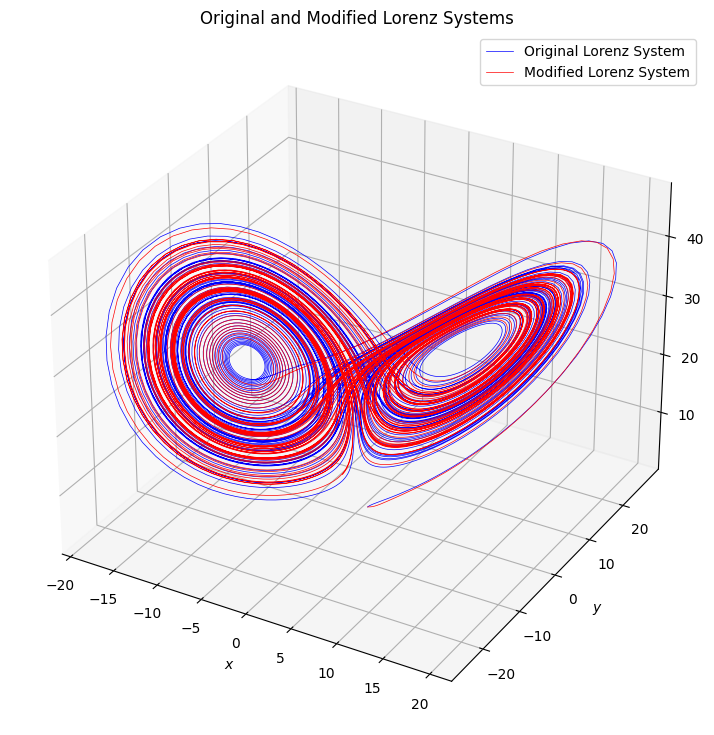

In [6]:
# Combined plot
fig_combined = plt.figure(figsize=(15, 9))
ax_combined = fig_combined.add_subplot(111, projection='3d')

# Original Lorenz system plot
ax_combined.plot(x, y, z, label='Original Lorenz System', color='blue', lw = 0.5)

# Modified Lorenz system plot
ax_combined.plot(m_u, m_v, m_w, label='Modified Lorenz System', color='red', lw = 0.5)

# Set axis labels and title

ax_combined.set_xlabel("$x$")
ax_combined.set_ylabel("$y$")
ax_combined.set_zlabel("$z$")
ax_combined.set_title("Original and Modified Lorenz Systems")

# Add legend
ax_combined.legend()

# Display the plot
plt.show()


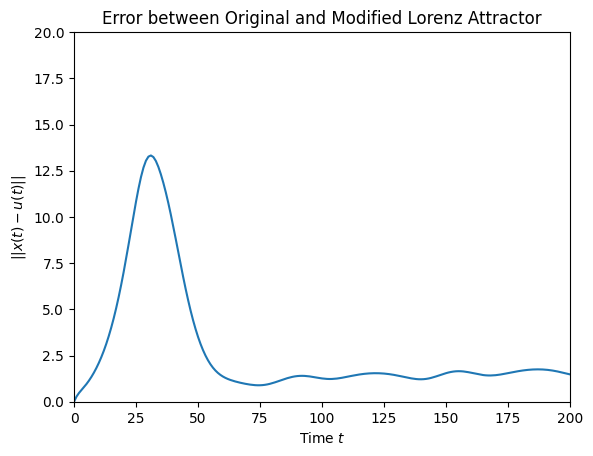

In [7]:
# Calculate the error and plot it
error = np.sqrt((x - m_u)**2 + (y - m_v)**2 + (z - m_w)**2)
plt.plot(error)
plt.xlabel("Time $t$")
plt.ylabel("$||x(t)-u(t)||$")
plt.title("Error between Original and Modified Lorenz Attractor")
# Set the limits for the x-axis and y-axis
plt.xlim([0, 200])  # Change the range as desired
plt.ylim([0, 20]) 
plt.show()

### Using a Neural network to learn the underlying system

The neural network used here is a Multilayer Perceptron (MLP) with two hidden layers, each having 10 neurons. 

- For each neuron, the output `h` is computed as: 
   
   $h_i = f(\mathbf{W}_i \cdot \mathbf{x} + b_i)$ 

   where $\mathbf{W}_i$ is the weight vector, $b_i$ is the bias, $\mathbf{x}$ is the input, and $f$ is the ReLU activation function. 

- The model is trained to minimize the Mean Squared Error (MSE) loss, defined as: 

   $L = \frac{1}{N} \sum (y_i - \hat{y}_i)^2$

   where $y_i$ is the true value, $\hat{y}_i$ is the predicted value, and $N$ is the number of samples.

- The Adam optimizer is used for training, which adaptively adjusts the learning rate based on the gradients of the loss function. 

- The model is trained with normalized data and the predictions are then de-normalized back to the original scale. 

- The data is divided into training, validation, and test sets to prevent overfitting and evaluate the model's performance.

250/250 [==============================] - 0s 2ms/step


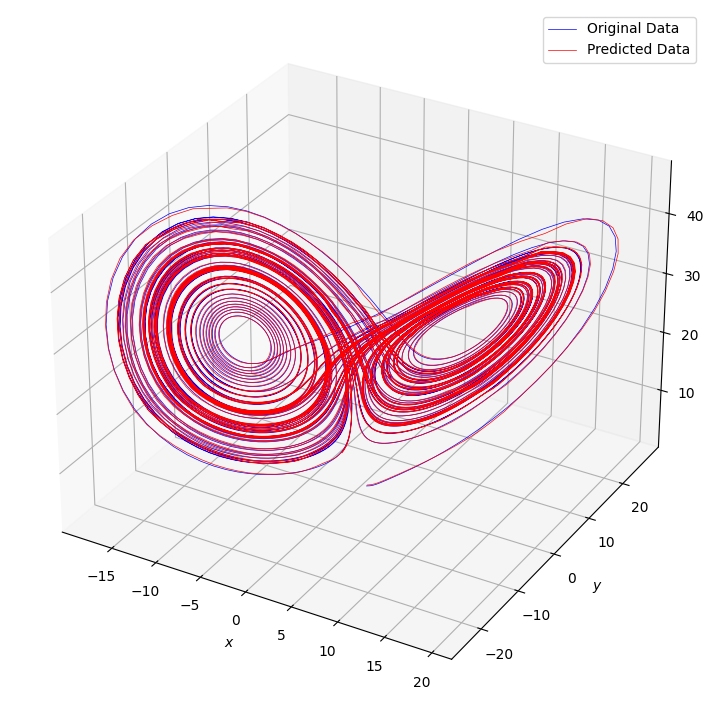

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from mpl_toolkits.mplot3d import Axes3D


# Define your training data and labels
X = np.array([m_u[:-1], m_v[:-1], m_w[:-1]]).T
y_ = np.array([m_u[1:], m_v[1:], m_w[1:]]).T

# Normalize your data based on the original data statistics
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)

X_norm = (X - mean) / std
y_norm = (y_ - mean) / std

# Define your model
model = Sequential()
model.add(Dense(10, input_dim=3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3))

# Compile and train your model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_norm, y_norm, epochs=100, verbose = 0)

# Generate predictions
predictions_norm = model.predict(X_norm)

# Reverse the normalization using the original data statistics
predictions = predictions_norm * std + mean

# Extract the individual time series
predicted_u, predicted_v, predicted_w = predictions.T

# Plot the results
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data
ax.plot(m_u[:-1], m_v[:-1], m_w[:-1], label='Original Data', lw = .5, color = 'blue')

# Plot the predicted data
ax.plot(predicted_u, predicted_v, predicted_w, label='Predicted Data', lw = .5, color = 'red')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.legend()
plt.show()


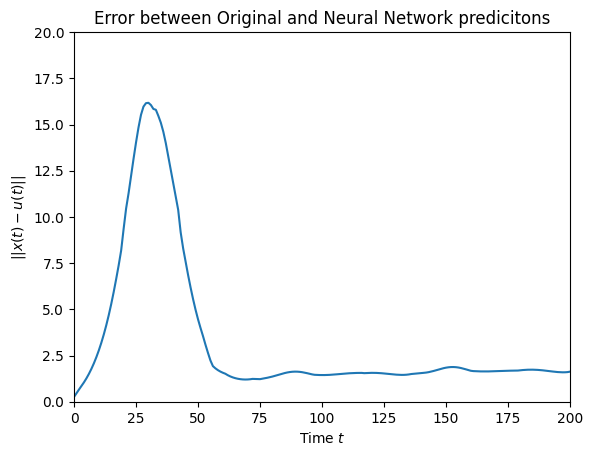

In [9]:
# Calculate the error and plot it
error = np.sqrt((x[0:8000] - predicted_u)**2 + (y[0:8000] - predicted_v)**2 + (z[0:8000] - predicted_w)**2)
plt.plot(error)
plt.xlabel("Time $t$")
plt.ylabel("$||x(t)-u(t)||$")
plt.title("Error between Original and Neural Network predicitons")
# Set the limits for the x-axis and y-axis
plt.xlim([0, 200])  # Change the range as desired
plt.ylim([0, 20]) 
plt.show()

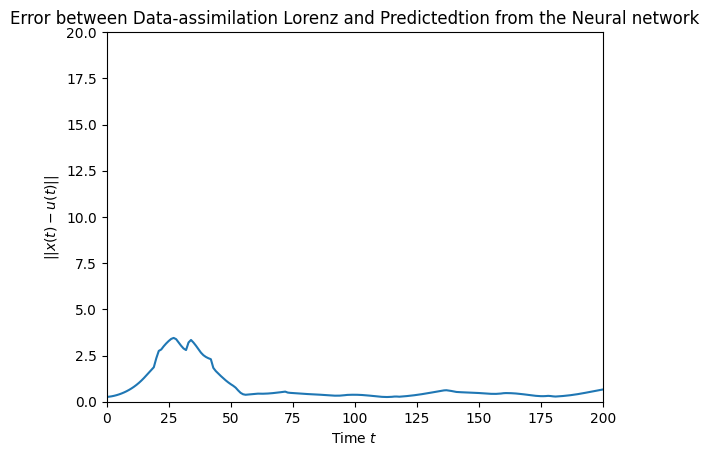

In [10]:
# Calculate the error and plot it
error = np.sqrt((m_u[0:8000] - predicted_u)**2 + (m_v[0:8000] - predicted_v)**2 + (m_w[0:8000] - predicted_w)**2)
plt.plot(error)
plt.xlabel("Time $t$")
plt.ylabel("$||x(t)-u(t)||$")
plt.title("Error between Data-assimilation Lorenz and Predictedtion from the Neural network")
# Set the limits for the x-axis and y-axis
plt.xlim([0, 200])  # Change the range as desired
plt.ylim([0, 20]) 
plt.show()